In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
cs1 = pd.read_csv('/content/customer_churn_data.csv')
cs1.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [65]:
cs1.shape

(1000, 10)

In [66]:
cs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [67]:
cs1.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [68]:
cs1.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [69]:
cs1['InternetService'].fillna(cs1['InternetService'].mode()[0] , inplace=True)

In [70]:
cs1.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


<Axes: >

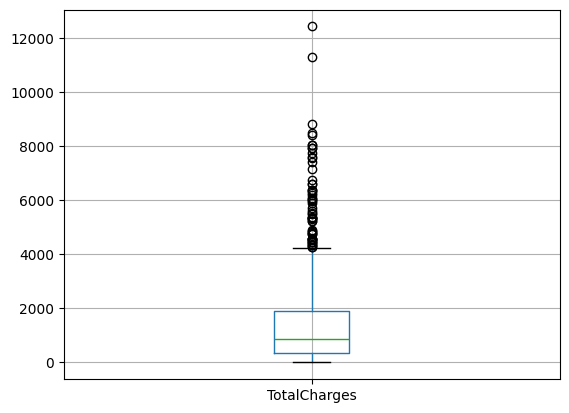

In [71]:
cs1.boxplot(column='TotalCharges')

In [72]:
cs1.drop(columns='CustomerID' , inplace=True )

In [73]:
cs1.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [74]:
ContractType = pd.Categorical(cs1["ContractType"] , ordered = True)
ContractType = ContractType.rename_categories(["Monthly" , "One Year" , "Two Year"])
cs1['ContractType'] = ContractType
cs1['ContractType'].value_counts()

,count
ContractType,
Monthly,511
One Year,289
Two Year,200


In [75]:
cs1['Churn'].value_counts()

,count
Churn,
Yes,883
No,117


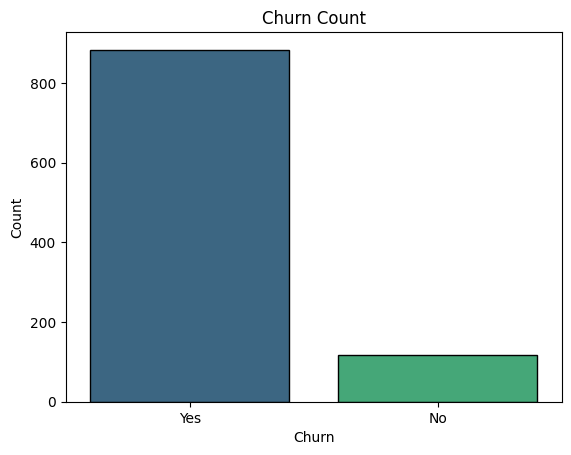

In [100]:
sns.countplot(x='Churn' , data=cs1 , palette='viridis' , edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count')
plt.show()

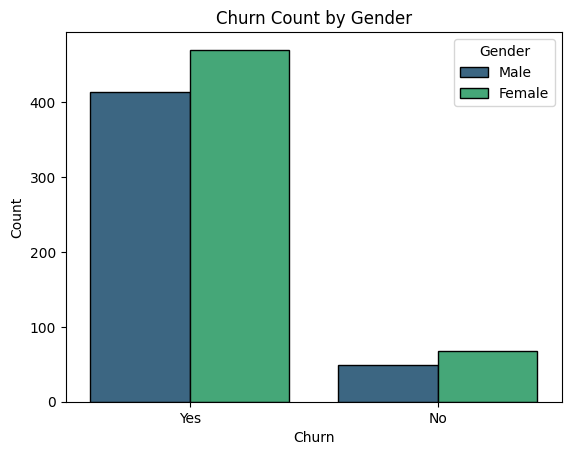

In [99]:
sns.countplot(data=cs1 , x='Churn' , hue='Gender' , palette='viridis' , edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count by Gender')
plt.show()

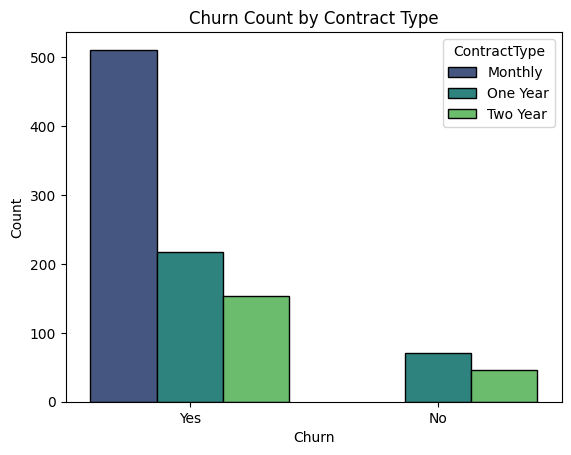

In [101]:
sns.countplot(x='Churn' , data = cs1 , hue='ContractType' , palette='viridis' , edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count by Contract Type')
plt.show()

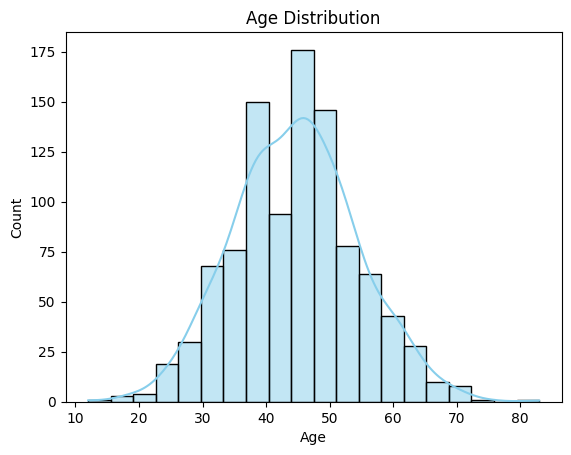

In [102]:
sns.histplot(cs1['Age'] , bins=20 , kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

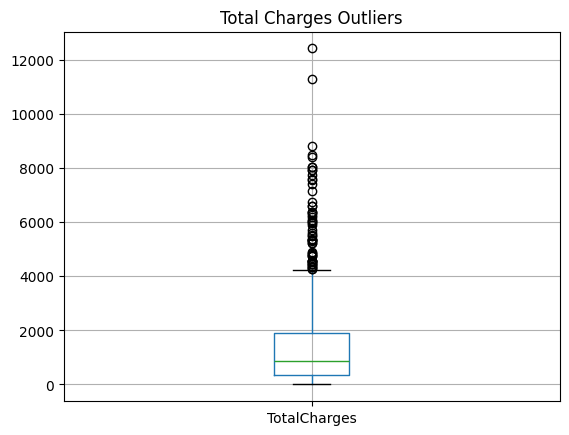

In [105]:
cs1.boxplot(column='TotalCharges')
plt.title('Total Charges Outliers')
plt.show()

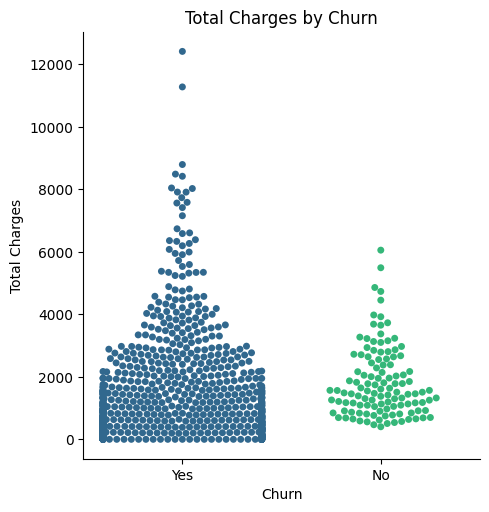

In [106]:
sns.catplot(data=cs1 , x='Churn' , y='TotalCharges' , kind='swarm' , palette='viridis' , edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Total Charges by Churn')
plt.show()

In [82]:
cs1['TechSupport'].value_counts()

,count
TechSupport,
Yes,506
No,494


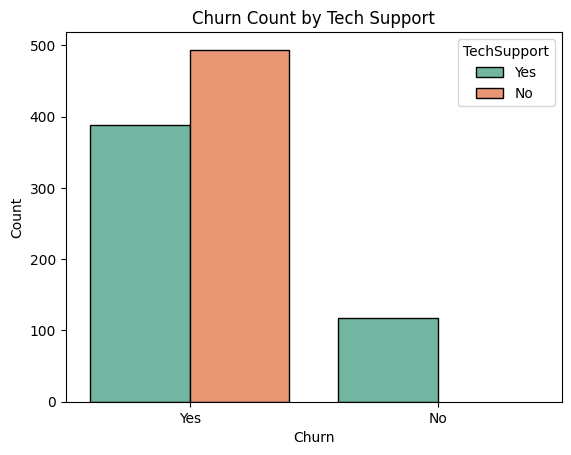

In [107]:
sns.countplot(data=cs1 , x = 'Churn' , hue='TechSupport' , palette='Set2' , edgecolor='black' )
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count by Tech Support')
plt.show()

In [85]:
cs1['InternetService'].value_counts()

,count
InternetService,
Fiber Optic,692
DSL,308


Text(0.5, 1.0, 'Internet Service Count by Churn')

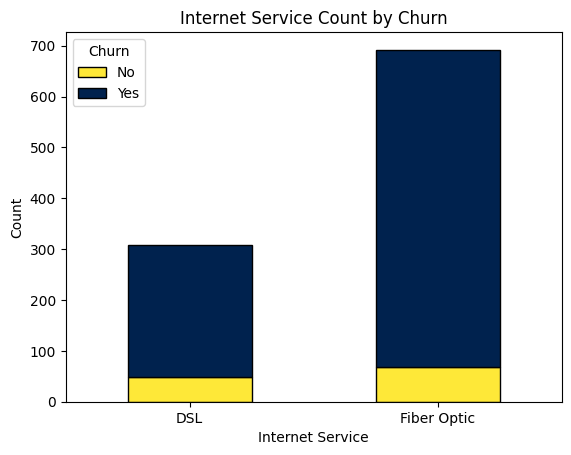

In [86]:
pd.crosstab(cs1['InternetService'] , cs1['Churn']).plot(kind='bar', stacked=True, colormap='cividis_r' , edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Internet Service Count by Churn')

In [108]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [89]:
X = cs1.drop('Churn', axis=1)
y = cs1['Churn']  # ✅ This is a Series (1D array)

In [90]:
X['ContractType'] = LabelEncoder().fit_transform(X['ContractType'])
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])
X['InternetService'] = LabelEncoder().fit_transform(X['InternetService'])
X['TechSupport'] = LabelEncoder().fit_transform(X['TechSupport'])


X

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,49,1,4,88.35,0,1,353.40,1
1,43,1,0,36.67,0,1,0.00,1
2,51,0,2,63.79,0,1,127.58,0
3,60,0,8,102.34,1,0,818.72,1
4,42,1,32,69.01,0,1,2208.32,0
...,...,...,...,...,...,...,...,...
995,42,1,41,37.14,0,1,1522.74,1
996,62,1,9,80.93,0,1,728.37,0
997,51,0,15,111.72,0,1,1675.80,1
998,39,1,68,65.67,1,1,4465.56,0


In [91]:
y = LabelEncoder().fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [92]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [95]:
models = { 'Linear Regression' : LinearRegression() , 'Logistics Regression' : LogisticRegression() , 'Decision Tree' : DecisionTreeClassifier() ,
          'Random Forest' : RandomForestClassifier() , 'SVC' : SVC() , 'Naive Bayes' : GaussianNB() , 'KNN' : KNeighborsClassifier() }

In [96]:
result = { 'Model' : [] , 'Accuracy' : [] , 'Precision' : [] , 'Recall' : [] , 'F-1 Score' : []}

In [97]:
for i in models:
  obj = models[i]
  obj.fit(X_train , y_train)
  obj_pred = obj.predict(X_test)

  accuracy = accuracy_score(y_test, obj_pred>0.5)
  precision = precision_score(y_test, obj_pred>0.5)
  recall = recall_score(y_test, obj_pred>0.5)
  f1 = f1_score(y_test, obj_pred>0.5)

  result['Model'].append(i)
  result['Accuracy'].append(accuracy)
  result['Precision'].append(precision)
  result['Recall'].append(recall)
  result['F-1 Score'].append(f1)

result_df = pd.DataFrame(result)
result_df

,Model,Accuracy,Precision,Recall,F-1 Score
0,Linear Regression,0.895,0.897959,0.994350,0.943700
1,Logistics Regression,0.900,0.933702,0.954802,0.944134
2,Decision Tree,1.000,1.000000,1.000000,1.000000
3,Random Forest,1.000,1.000000,1.000000,1.000000
4,SVC,0.885,0.885000,1.000000,0.938992
5,Naive Bayes,0.910,0.993789,0.903955,0.946746
6,KNN,0.870,0.883249,0.983051,0.930481


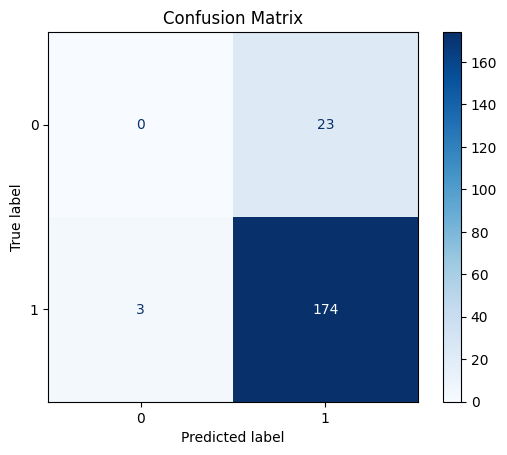

In [98]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

cm = confusion_matrix(y_test, obj_pred>0.5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=obj.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

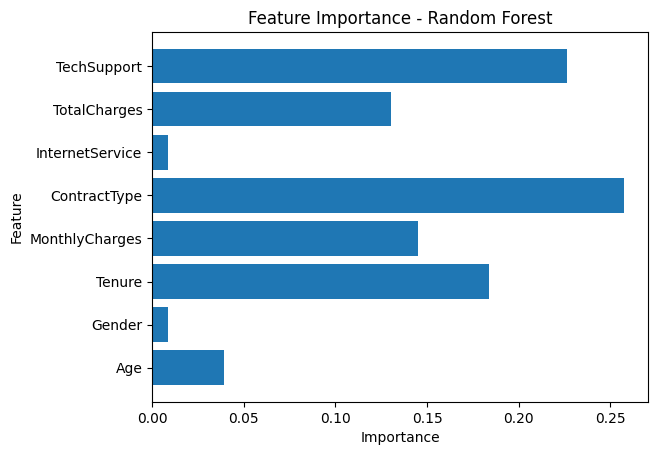

In [119]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
plt.barh(X.columns, importances )
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

AUC: 1.0


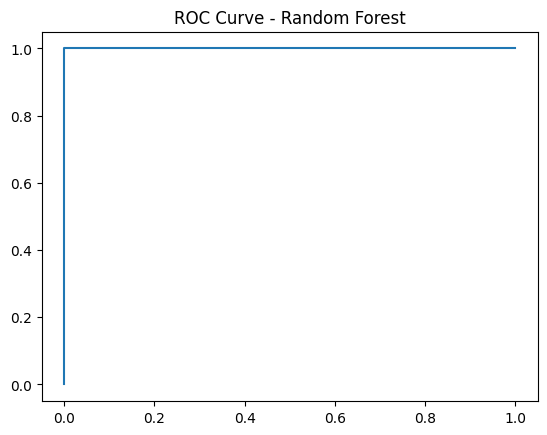

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test,  rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.title("ROC Curve - Random Forest")
print("AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


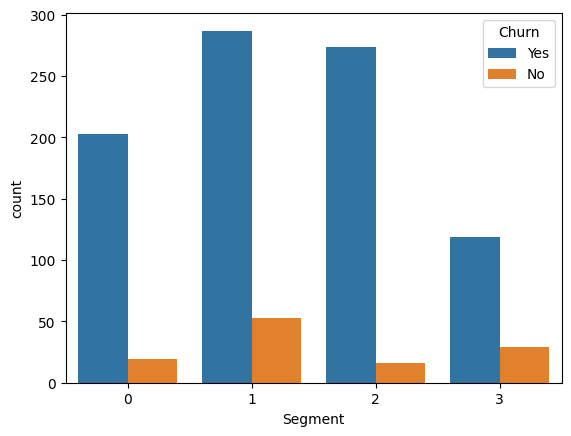

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

segment_features = cs1[['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']]
scaler = StandardScaler()
scaled = scaler.fit_transform(segment_features)

kmeans = KMeans(n_clusters=4, random_state=42)
cs1['Segment'] = kmeans.fit_predict(scaled)

sns.countplot(x='Segment', hue='Churn', data=cs1)
plt.show()